In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

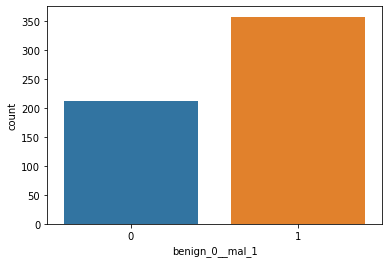

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

In [10]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

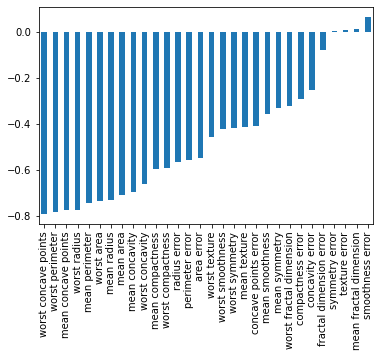

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

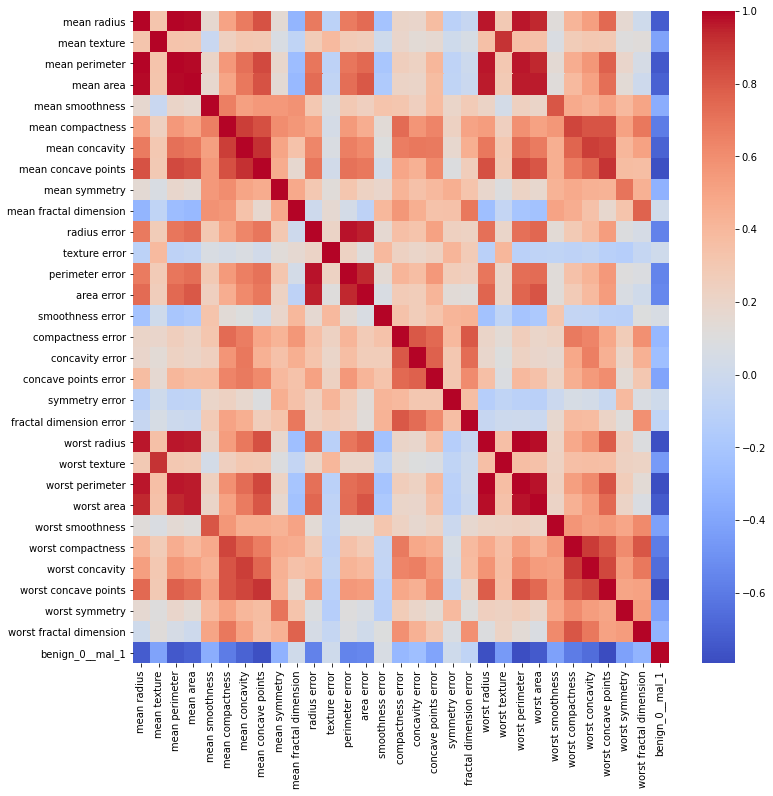

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='coolwarm')

In [18]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train=scaler.fit_transform(X_train)

In [24]:
X_test=scaler.transform(X_test)

Stopping overfitting

In [29]:
from tensorflow.keras.models import Sequential

/Users/victorpopa/.pyenv/versions/anaconda3-2020.11/envs/MLPractice/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/victorpopa/.pyenv/versions/anaconda3-2020.11/envs/MLPractice/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/victorpopa/.pyenv/versions/anaconda3-2020.11/envs/MLPractice/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'

In [30]:
from tensorflow.keras.layers import Dense,Dropout

In [31]:
X_train.shape

(426, 30)

In [32]:
model=Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION USE SIGMOID ACTIVATOR
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [33]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6767 - val_loss: 0.6517
Epoch 2/600
426/426 [==============================] - 0s 167us/sample - loss: 0.6308 - val_loss: 0.6119
Epoch 3/600
426/426 [==============================] - 0s 172us/sample - loss: 0.5891 - val_loss: 0.5725
Epoch 4/600
426/426 [==============================] - 0s 133us/sample - loss: 0.5469 - val_loss: 0.5289
Epoch 5/600
426/426 [==============================] - 0s 130us/sample - loss: 0.5015 - val_loss: 0.4792
Epoch 6/600
426/426 [==============================] - 0s 122us/sample - loss: 0.4571 - val_loss: 0.4296
Epoch 7/600
426/426 [==============================] - 0s 121us/sample - loss: 0.4096 - val_loss: 0.3816
Epoch 8/600
426/426 [==============================] - 0s 126us/sample - loss: 0.3659 - val_loss: 0.3381
Epoch 9/600
426/426 [=

Epoch 151/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0340 - val_loss: 0.1106
Epoch 152/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0337 - val_loss: 0.1080
Epoch 153/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0336 - val_loss: 0.1123
Epoch 154/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0334 - val_loss: 0.1049
Epoch 155/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0357 - val_loss: 0.1134
Epoch 156/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0333 - val_loss: 0.1111
Epoch 157/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0331 - val_loss: 0.1115
Epoch 158/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0331 - val_loss: 0.1139
Epoch 159/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0340 - val_loss: 0.1124
Epoch 160/600
426/426 [==============

Epoch 304/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0258 - val_loss: 0.1656
Epoch 305/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0242 - val_loss: 0.1401
Epoch 306/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0194 - val_loss: 0.1568
Epoch 307/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0172 - val_loss: 0.1552
Epoch 308/600
426/426 [==============================] - 0s 100us/sample - loss: 0.0171 - val_loss: 0.1397
Epoch 309/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0164 - val_loss: 0.1621
Epoch 310/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0205 - val_loss: 0.1440
Epoch 311/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0171 - val_loss: 0.1494
Epoch 312/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0163 - val_loss: 0.1466
Epoch 313/600
426/426 [===============

Epoch 457/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0087 - val_loss: 0.2378
Epoch 458/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0086 - val_loss: 0.2096
Epoch 459/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0077 - val_loss: 0.2230
Epoch 460/600
426/426 [==============================] - 0s 90us/sample - loss: 0.0074 - val_loss: 0.2185
Epoch 461/600
426/426 [==============================] - 0s 100us/sample - loss: 0.0080 - val_loss: 0.2302
Epoch 462/600
426/426 [==============================] - 0s 100us/sample - loss: 0.0081 - val_loss: 0.2155
Epoch 463/600
426/426 [==============================] - 0s 90us/sample - loss: 0.0070 - val_loss: 0.2218
Epoch 464/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0070 - val_loss: 0.2201
Epoch 465/600
426/426 [==============================] - 0s 90us/sample - loss: 0.0081 - val_loss: 0.2360
Epoch 466/600
426/426 [==================

Epoch 534/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0043 - val_loss: 0.2747
Epoch 535/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0050 - val_loss: 0.2838
Epoch 536/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0049 - val_loss: 0.2782
Epoch 537/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0046 - val_loss: 0.2803
Epoch 538/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0046 - val_loss: 0.2857
Epoch 539/600
426/426 [==============================] - 0s 88us/sample - loss: 0.0050 - val_loss: 0.2781
Epoch 540/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0051 - val_loss: 0.2948
Epoch 541/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0049 - val_loss: 0.2711
Epoch 542/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0047 - val_loss: 0.2871
Epoch 543/600
426/426 [======================

In [34]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

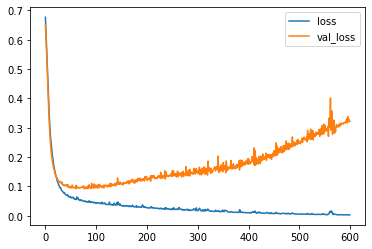

In [35]:
losses.plot()

In [40]:
model=Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, the direction is automatically inferred
 |          from the name of the monitored quantity.
 |      baseline: Baseline value for the mo

In [39]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [41]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6496 - val_loss: 0.6222
Epoch 2/600
426/426 [==============================] - 0s 180us/sample - loss: 0.5929 - val_loss: 0.5695
Epoch 3/600
426/426 [==============================] - 0s 146us/sample - loss: 0.5376 - val_loss: 0.5144
Epoch 4/600
426/426 [==============================] - 0s 160us/sample - loss: 0.4855 - val_loss: 0.4610
Epoch 5/600
426/426 [==============================] - 0s 178us/sample - loss: 0.4320 - val_loss: 0.4051
Epoch 6/600
426/426 [==============================] - 0s 119us/sample - loss: 0.3790 - val_loss: 0.3527
Epoch 7/600
426/426 [==============================] - 0s 143us/sample - loss: 0.3342 - val_loss: 0.3117
Epoch 8/600
426/426 [==============================] - 0s 165us/sample - loss: 0.2977 - val_loss: 0.2753
Epoch 9/600
426/426 [==============================] - 0s 217us/sample - loss: 0.2695 - val_loss: 0.2516
Epoch 10/60

In [42]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

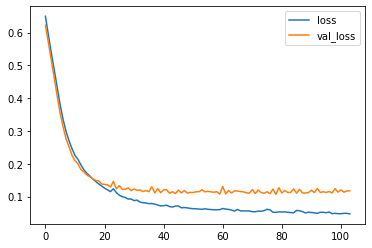

In [43]:
model_loss.plot()

In [44]:
from tensorflow.keras.layers import Dropout

In [45]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))


#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [46]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 5ms/sample - loss: 0.7108 - val_loss: 0.6738
Epoch 2/600
426/426 [==============================] - 0s 276us/sample - loss: 0.6911 - val_loss: 0.6474
Epoch 3/600
426/426 [==============================] - 0s 223us/sample - loss: 0.6631 - val_loss: 0.6244
Epoch 4/600
426/426 [==============================] - 0s 212us/sample - loss: 0.6251 - val_loss: 0.6046
Epoch 5/600
426/426 [==============================] - 0s 203us/sample - loss: 0.6183 - val_loss: 0.5822
Epoch 6/600
426/426 [==============================] - 0s 210us/sample - loss: 0.6005 - val_loss: 0.5607
Epoch 7/600
426/426 [==============================] - 0s 207us/sample - loss: 0.5875 - val_loss: 0.5364
Epoch 8/600
426/426 [==============================] - 0s 227us/sample - loss: 0.5652 - val_loss: 0.5159
Epoch 9/600
426/426 [==============================] - 0s 183us/sample - loss: 0.5271 - val_loss: 0.4869
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 187us/sample - loss: 0.1582 - val_loss: 0.0966
Epoch 79/600
426/426 [==============================] - 0s 162us/sample - loss: 0.1410 - val_loss: 0.1005
Epoch 80/600
426/426 [==============================] - 0s 176us/sample - loss: 0.1347 - val_loss: 0.1010
Epoch 81/600
426/426 [==============================] - 0s 141us/sample - loss: 0.1386 - val_loss: 0.0952
Epoch 82/600
426/426 [==============================] - 0s 190us/sample - loss: 0.1151 - val_loss: 0.1060
Epoch 83/600
426/426 [==============================] - 0s 145us/sample - loss: 0.1100 - val_loss: 0.0953
Epoch 84/600
426/426 [==============================] - 0s 167us/sample - loss: 0.1365 - val_loss: 0.0978
Epoch 85/600
426/426 [==============================] - 0s 163us/sample - loss: 0.1354 - val_loss: 0.1030
Epoch 86/600
426/426 [==============================] - 0s 134us/sample - loss: 0.1381 - val_loss: 0.1016
Epoch 87/600
426/426 [========================

In [47]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

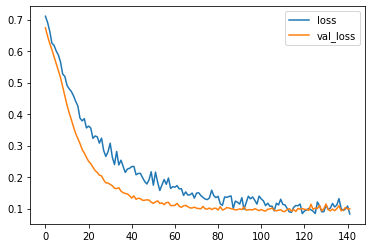

In [48]:
model_loss.plot()

In [50]:
predictions=model.predict_classes(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [53]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
